# 5팀 _ PTJ
#### 팀원 : 남승현, 원광연, 임세홍, 최예준, 김수진

### 분석 목적 : 휘발유 가격에 미치는 요소 분석

|분석 요소|분석 내용|
|--------------------|---------------|
|분석1|테스트2|
|분석2|테스트2|
|분석3|테스트2|
|분석4|테스트2|
|분석5|테스트2|
    

### 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
seoul_first = pd.read_csv('../data/2020년 상반기 주유소 판매가격.csv',encoding='cp949')
seoul_first
seoul_second = pd.read_csv('../data/2020년 하반기 주유소 판매가격.csv',encoding='cp949')
seoul_second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 월간(202007~202012),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 07월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 08월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 09월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 10월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2946,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.0,1402.65,1211.10,0.0
2947,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.0,1393.00,1203.00,0.0
2948,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.0,1338.42,1148.42,0.0
2949,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.0,1292.00,1092.37,0.0


In [4]:
seoul=pd.concat([seoul_first,seoul_second])[1:]
seoul
# seoul.info()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)





<ipython-input-4-0ab17fdcf4c8>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
# 상표별 가격 ex) 같은 상표별 지역에 따른 가격 차이, 같은 지역의 다른 상표별 가격 차이
seoul.pivot_table('휘발유',index=['상표'],aggfunc='mean').sort_values('휘발유', ascending=False)

,휘발유
상표,
SK에너지,1517.494476
GS칼텍스,1480.077478
S-OIL,1434.653561
현대오일뱅크,1427.582881
자가상표,1414.056800
알뜰주유소,1355.216043
알뜰(ex),1330.236667


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\mat

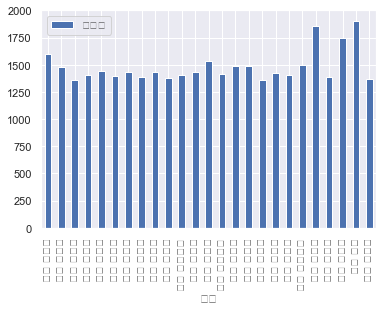

<Figure size 2160x720 with 0 Axes>

In [36]:
# 지역별 가격 ex) 다른 구에 위치한 같은 주유소의 가격 
seoul.pivot_table('휘발유',index=['지역'],aggfunc='mean').plot(kind='bar')
plt.figure(figsize=(30, 10))
plt.show()

<AxesSubplot:>

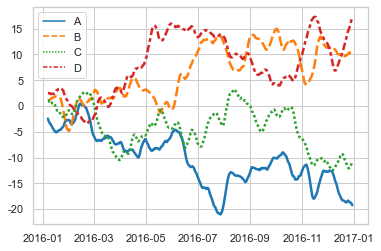

In [7]:
# 기간별 가격 ex) 기간별 전체 주유소의 가격/광연
#seoul.pivot_table('휘발유',index=['기간'],aggfunc='mean')
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [8]:
# 기간별+지역 ex)  기간별 다른 지역의 동일한 상호 가격, 기간별 같은 지역의 다른 상호 가격 / 승현
seoul.pivot_table('휘발유',index=['지역','기간'],aggfunc='mean')

휘발유
지역      기간                    
서울 강남구  2020년 01월  1771.252750
        2020년 02월  1754.086750
        2020년 03월  1703.356500
        2020년 04월  1580.068250
        2020년 05월  1504.057250
        2020년 06월  1540.887000
        2020년 07월  1569.828250
        2020년 08월  1574.318750
        2020년 09월  1554.379744
        2020년 10월  1550.467436
        2020년 11월  1543.167368
        2020년 12월  1564.309211
서울 강동구  2020년 01월  1646.620000
        2020년 02월  1618.855625
        2020년 03월  1556.316250
        2020년 04월  1419.257500
        2020년 05월  1355.564375
        2020년 06월  1423.028750
        2020년 07월  1466.495625
        2020년 08월  1472.664375
        2020년 09월  1475.308750
        2020년 10월  1455.615000
        2020년 11월  1442.685625
        2020년 12월  1467.394375
서울 강북구  2020년 01월  1538.201538
        2020년 02월  1513.650000
        2020년 03월  1438.353846
        2020년 04월  1270.588462
        2020년 05월  1216.083846
        2020년 06월  1312.159231
        2020년 07월  1354.995385
        2020년 08월  1357.291538
        2020년 09월  1345.636154
        2020년 10월  1313.496923
        2020년 11월  1282.606923
        2020년 12월  1353.686154
서울 강서구  2020년 01월  1589.972941
        2020년 02월  1561.463235
        2020년 03월  1482.930000
        2020년 04월  1345.198529
        2020년 05월  1289.162941
        2020년 06월  1361.172059
        2020년 07월  1389.361818
        2020년 08월  1391.417273
        2020년 09월  1382.606061
        2020년 10월  1359.710909
        2020년 11월  1340.857879
        2020년 12월  1396.406970
서울 관악구  2020년 01월  1607.645000
        2020년 02월  1587.043750
        2020년 03월  1534.165000
        2020년 04월  1406.089375
        2020년 05월  1315.498750
        2020년 06월  1378.938750
        2020년 07월  1419.215000
        2020년 08월  1419.962500
        2020년 09월  1417.950588
        2020년 10월  1402.724375
        2020년 11월  1385.651875
        2020년 12월  1415.713750
서울 광진구  2020년 01월  1572.152941
        2020년 02월  1542.480000
        2020년 03월  1464.437059
        2020년 04월  1331.376471
        2020년 05월  1265.823529
        2020년 06월  1347.382941
        2020년 07월  1384.752941
        2020년 08월  1390.255882
        2020년 09월  1379.150000
        2020년 10월  1353.141176
        2020년 11월  1340.816471
        2020년 12월  1393.207059
서울 구로구  2020년 01월  1616.440476
        2020년 02월  1595.444286
        2020년 03월  1521.046364
        2020년 04월  1383.372727
        2020년 05월  1311.445455
        2020년 06월  1381.291818
        2020년 07월  1410.962727
        2020년 08월  1409.382727
        2020년 09월  1394.080000
        2020년 10월  1371.432727
        2020년 11월  1361.139091
        2020년 12월  1409.151364
서울 금천구  2020년 01월  1576.257692
        2020년 02월  1539.090000
        2020년 03월  1475.475385
        2020년 04월  1340.901538
        2020년 05월  1270.743077
        2020년 06월  1345.436923
        2020년 07월  1382.904615
        2020년 08월  1391.076154
        2020년 09월  1374.235385
        2020년 10월  1319.637143
        2020년 11월  1304.122308
        2020년 12월  1371.359231
서울 노원구  2020년 01월  1618.683333
        2020년 02월  1591.327333
        2020년 03월  1521.299333
        2020년 04월  1380.264667
        2020년 05월  1313.816667
        2020년 06월  1380.069333
        2020년 07월  1415.372667
        2020년 08월  1408.412857
        2020년 09월  1400.465000
        2020년 10월  1386.324286
        2020년 11월  1372.405000
        2020년 12월  1410.942143
서울 도봉구  2020년 01월  1557.124444
        2020년 02월  1528.988889
        2020년 03월  1446.056667
        2020년 04월  1289.199444
        2020년 05월  1230.591667
        2020년 06월  1335.514444
        2020년 07월  1378.916667
        2020년 08월  1381.295556
        2020년 09월  1367.510556
        2020년 10월  1335.398889
        2020년 11월  1316.588889
        2020년 12월  1373.663889
서울 동대문구 2020년 01월  1587.584545
        2020년 02월  1562.787727
        2020년 03월  1494.990455
        2020년 04월  1354.626087
        2020년 05월  1268.465455
        2020년 06월  1359.237727
        2020년 07월  1401.585909
        2020년 08월  1401.4213

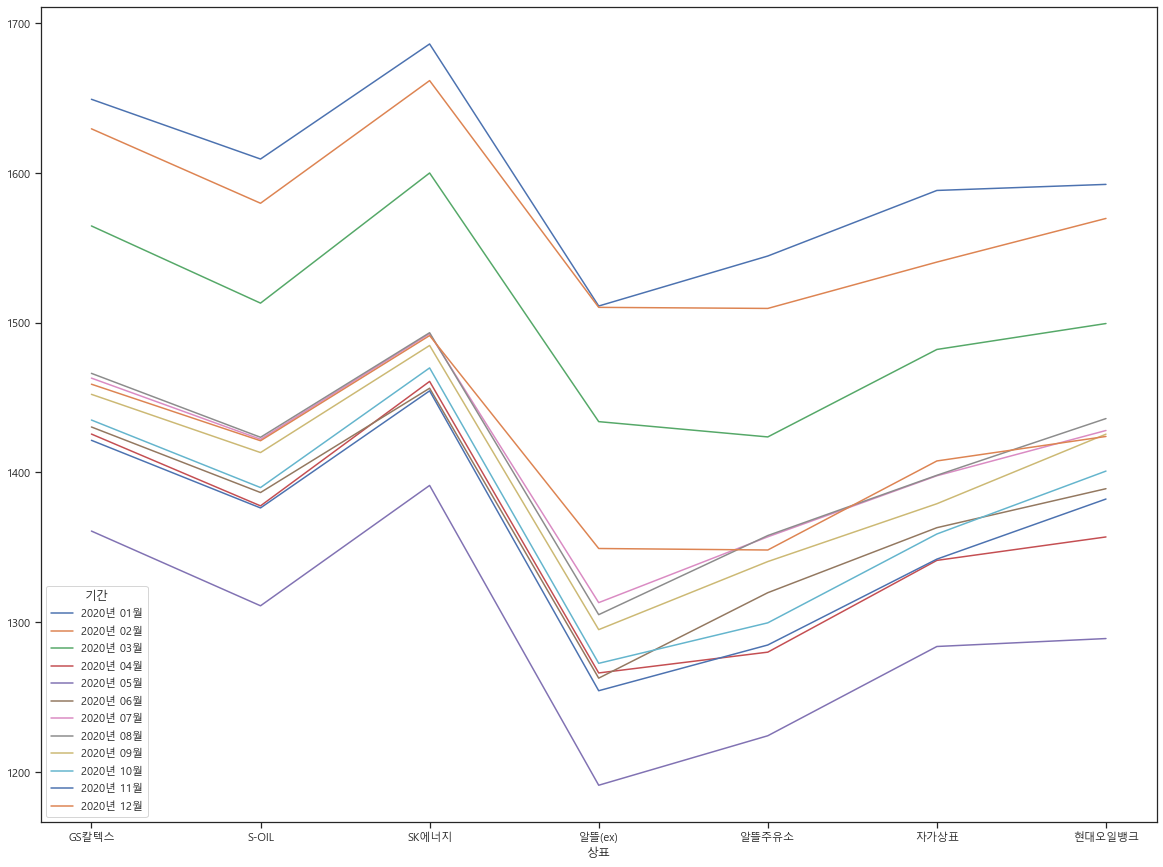

In [80]:
# 상표별+기간 ex) 기간별 상표에 따른 가격
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams["figure.figsize"] = (20,15)
seoul.pivot_table('휘발유','상표','기간',aggfunc='mean').plot()

plt.show()



In [10]:
# 지역+상표 가격 차이
seoul.pivot_table('휘발유',index=['지역','상표'],aggfunc='mean')/ 세홍

NameError: name '세홍' is not defined

In [73]:
# 상표별 가격 순위 (10)
#seoul.pivot_table('휘발유',index=['상표']).sort_values('휘발유', ascending=False).head(10)
#df.groupby(['Gender'])['Silver'].agg('sum')
#seoul.pivot_table('휘발유',index=['상표']).sort_values('휘발유', ascending=False).head(10)
seoul_1=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=False).head(10)
seoul_1

,상표,휘발유,지역
2839,SK에너지,2320.55,서울 중구
2840,SK에너지,2278.14,서울 중구
2863,GS칼텍스,2238.00,서울 중구
2841,SK에너지,2227.74,서울 중구
2805,SK에너지,2224.84,서울 중구
85,SK에너지,2218.00,서울 강남구
2864,GS칼텍스,2215.69,서울 중구
2802,SK에너지,2214.70,서울 중구
86,SK에너지,2211.79,서울 강남구
2801,SK에너지,2210.29,서울 중구


In [ ]:
# 지역별 가격 낮은 순위 (10)
seoul_2=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=True).head(10)
seoul_2